<a href="https://colab.research.google.com/github/itzelperez22/proyecto_clasificacion_DS/blob/main/Proyecto_clasificaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   season   age  childish  accident  surgery  fevers  alcohol  smoking  \
0   -0.33  0.69       0.0         1        1       0      0.8        0   
1   -0.33  0.94       1.0         0        1       0      0.8        1   
2   -0.33  0.50       1.0         0        0       0      1.0       -1   
3   -0.33  0.75       0.0         1        1       0      1.0       -1   
4   -0.33  0.67       1.0         1        0       0      0.8       -1   

   sitting output  
0     0.88      n  
1     0.31      o  
2     0.50      n  
3     0.38      n  
4     0.50      o  
Accuracy: 0.9
Precision: 1.0
Recall: 0.0
F1 Score: 0.0
AUC: 0.19444444444444442


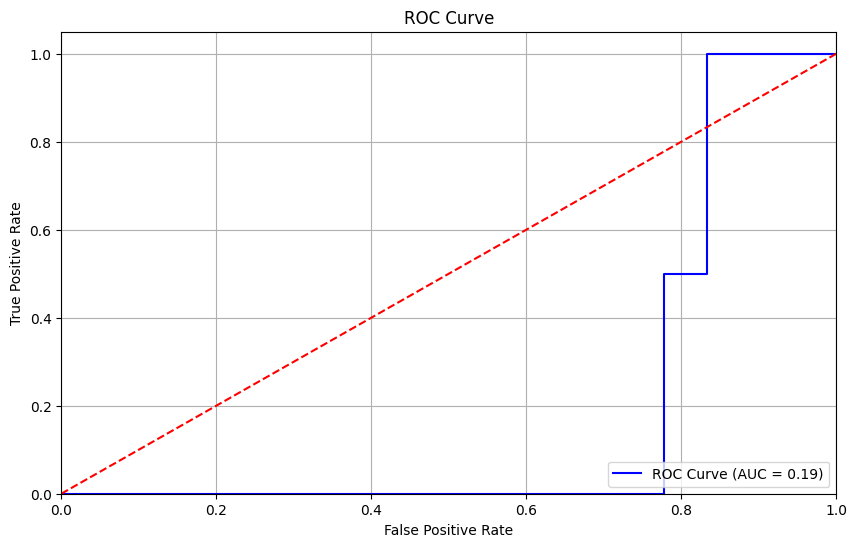

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,auc
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

data = pd.read_csv('dataSet.csv')
print(data.head(5))
features=['season','age','childish','accident','surgery','fevers','alcohol','smoking','sitting']
X = data[features]
y = data['output']

pd.set_option('future.no_silent_downcasting', True)
y = y.replace({'n': 0, 'o': 1})
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm = SVC(class_weight='balanced')
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100, 1000],
    'gamma': ['scale', 'auto'],
    'kernel': ['linear', 'rbf', 'poly'],
    'degree': [2, 3, 4]
}

grid_search = GridSearchCV(svm, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)
best_svm = grid_search.best_estimator_
y_pred = best_svm.predict(X_test_scaled)

accuracySVM = accuracy_score(y_test, y_pred)
precisionSVM = precision_score(y_test, y_pred, zero_division=1)
recallSVM = recall_score(y_test, y_pred)
f1SVM = f1_score(y_test, y_pred)

# AUC y roc
y_probs = best_svm.decision_function(X_test_scaled)
auc = roc_auc_score(y_test, y_probs)
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
'''
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)
'''
print(f"Accuracy: {accuracySVM}")
print(f"Precision: {precisionSVM}")
print(f"Recall: {recallSVM}")
print(f"F1 Score: {f1SVM}")
print(f"AUC: {auc}")

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

Decission Tree Clasifier

Accuracy: 0.85
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
AUC: 0.4722222222222222


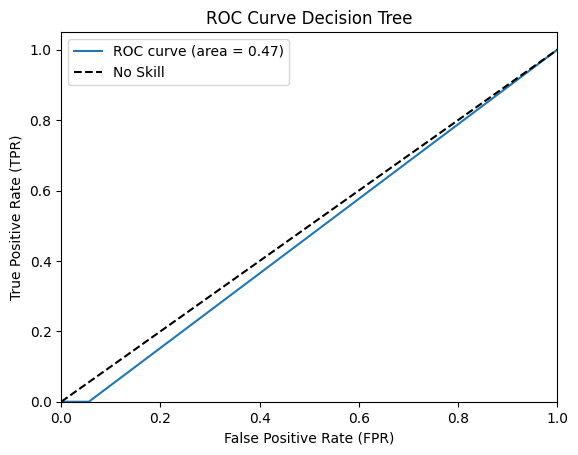

In [ ]:
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc


pca = PCA(n_components=X_train.shape[1])
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

dt_classifier = DecisionTreeClassifier()

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(dt_classifier, param_grid, cv=5)
grid_search.fit(X_train_pca, y_train)

best_dt = grid_search.best_estimator_
y_pred = best_dt.predict(X_test_pca)

accuracyDT = accuracy_score(y_test, y_pred)
precisionDT = precision_score(y_test, y_pred)
recallDT = recall_score(y_test, y_pred)
f1DT = f1_score(y_test, y_pred)
print(f"Accuracy: {accuracyDT}")
print(f"Precision: {precisionDT}")
print(f"Recall: {recallDT}")
print(f"F1 Score: {f1DT}")

y_score = best_dt.predict_proba(X_test_pca)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

print("AUC:", roc_auc)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve Decision Tree')
plt.legend()
plt.show()

Random Forest Classifier

Accuracy: 0.9
Precision: 1.0
Recall: 0.0
F1 Score: 0.0
AUC: 0.3055555555555556


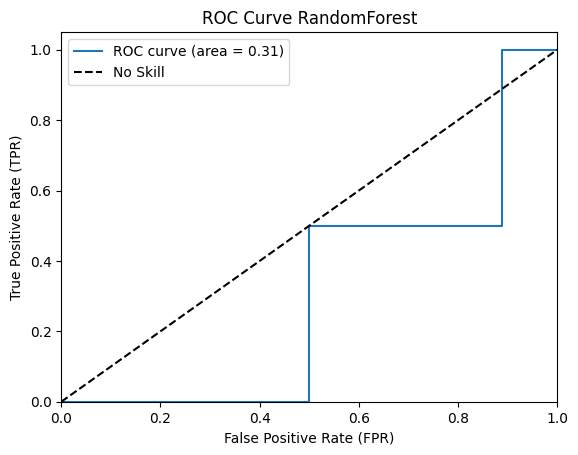

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc

X_train = X_train.sample(frac=1, axis=1, random_state=42)
X_test = X_test[X_train.columns]

rf_classifier = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(rf_classifier, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_rf_classifier = grid_search.best_estimator_
y_pred = best_rf_classifier.predict(X_test)

accuracyRF = accuracy_score(y_test, y_pred)
precisionRF = precision_score(y_test, y_pred,zero_division=1)
recallRF = recall_score(y_test, y_pred)
f1RF = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracyRF}")
print(f"Precision: {precisionRF}")
print(f"Recall: {recallRF}")
print(f"F1 Score: {f1RF}")

y_score = best_rf_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

print("AUC:", roc_auc)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve RandomForest')
plt.legend()
plt.show()


Extra Trees Classifier

Accuracy: 0.9
Precision: 1.0
Recall: 0.0
F1 Score: 0.0
AUC: 0.09722222222222224


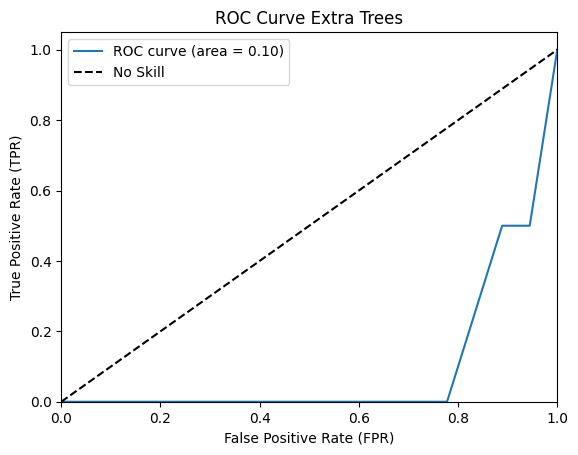

In [23]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc

pca = PCA(n_components=X_train.shape[1])
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

et_classifier = ExtraTreesClassifier()

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(et_classifier,param_grid, cv=5)
grid_search.fit(X_train_pca, y_train)

best_et_classifier = grid_search.best_estimator_
y_pred = best_et_classifier.predict(X_test_pca)

accuracyETC = accuracy_score(y_test, y_pred)
precisionETC = precision_score(y_test, y_pred,zero_division=1)
recallETC = recall_score(y_test, y_pred)
f1ETC = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracyETC}")
print(f"Precision: {precisionETC}")
print(f"Recall: {recallETC}")
print(f"F1 Score: {f1ETC}")

y_score = best_et_classifier.predict_proba(X_test_pca)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

print("AUC:", roc_auc)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve Extra Trees')
plt.legend()
plt.show()

Link a streamlit: https://355228-ds-2ndparcial.streamlit.app/